In [ ]:
Gradient Descent:
It is an optimization algorithm used to find the minimum value of a function.
It is particularly useful in machine learning for training models by minimizing the error between predicted and actual values.

Types of Gradient descent:

1. Batch Gradient Descent
2. Stochastic Gradient Descent
3. Mini-batch Gradient Descent

Batch Gradient Descent is a type of gradient descent algorithm where the gradient of the cost function is calculated using the entire training dataset for each update.

Stochastic Gradient Descent (SGD) is a variant of gradient descent where the gradient of the cost function is calculated using a single randomly selected training example for each update.

Mini-batch Gradient Descent is a hybrid approach that combines the best aspects of Batch Gradient Descent and Stochastic Gradient Descent.
It divides the training dataset into smaller subsets called mini-batches.

Validation set:
A validation set is a subset of a dataset used in the process of model training to evaluate the performance of the model being developed.
It is essential for preventing overfitting and selecting the best model configuration.
It is is crucial in the model development pipeline to ensure that the model performs well not only on the training data but also on new, unseen data.
It helps in selecting the best model architecture.

Validation loss:
Validation loss is a measure of how well a machine learning model is performing on the validation set.
It quantifies the difference between the predicted outputs of the model and the actual outputs in the validation set.
In general it is the loss calculated on the validation set during training. It is a metric that helps determine how well the model generalizes to new, unseen data.
The choice of the loss function depends on the type of problem.
Common loss functions include Mean Squared Error (MSE) for regression problems and Cross-Entropy Loss for classification problems.
At each epoch, the model's predictions on the validation set are compared to the actual values, and the loss is computed using the selected loss function.
Monitoring validation loss helps in evaluating the model's performance. A decreasing validation loss indicates that the model is learning and improving.
If the validation loss starts to increase while the training loss continues to decrease, it suggests that the model is overfitting the training data and not generalizing well to the validation data.
Validation loss can be used to select the best model among different configurations. The model with the lowest validation loss is typically chosen.
During training, hyperparameters such as learning rate, batch size, and model architecture can be adjusted based on the validation loss to improve performance.
A technique used to stop training when the validation loss stops decreasing, preventing overfitting and saving computational resources.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
tips = sns.load_dataset('tips')

print(tips.head())

# Convert categorical variables to numerical using one-hot encoding
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

# Separate features and target variable
X = tips.drop('tip', axis=1)
y = tips['tip']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [3]:
model = Sequential()

# Add input layer and first hidden layer
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))

# Add additional hidden layers
model.add(Dense(units=32, activation='relu'))

# Add output layer
model.add(Dense(units=1, activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [5]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 13.1123 - val_loss: 9.6804
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10.8200 - val_loss: 8.4905
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.9918 - val_loss: 7.3956
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.4172 - val_loss: 6.3551
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.9966 - val_loss: 5.3592
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.2963 - val_loss: 4.4369
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.8569 - val_loss: 3.6515
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.6805 - val_loss: 3.0244
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.6175 - val_loss: 2.5989
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.7091 - val_loss: 2.3576
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.0611 - val_loss: 2.2559
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7172 - val_loss: 

In [6]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
print("Predictions: ", y_pred[:5])

# Calculate and print accuracy or performance metric
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predictions:  [[3.3413515]
 [2.0520062]
 [3.9626453]
 [2.9552276]
 [2.4021268]]
Test Loss: 1.2207342386245728


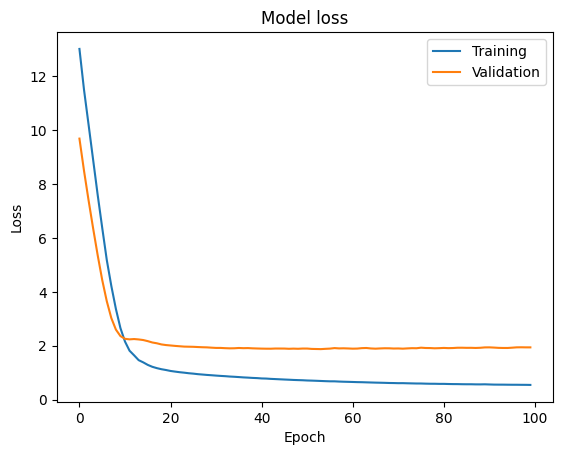

In [10]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()